In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

news = pd.read_json('../data/database.json')

In [15]:
import calendar
import datetime

# Erstellt eine neue Zeile mit dem Wochentag
news['day_of_week'] = news['date'].dt.day_of_week
news['day_of_week_word'] = news['date'].dt.day_name(locale='de_de') 

news['hour'] = news['date'].dt.hour
news['content_length'] = news['content'].str.len()

In [16]:
news = news.groupby(["hour", "day_of_week"]).agg(content_length_mean=('content_length', 'mean'), amount=('hour', 'size')).reset_index()

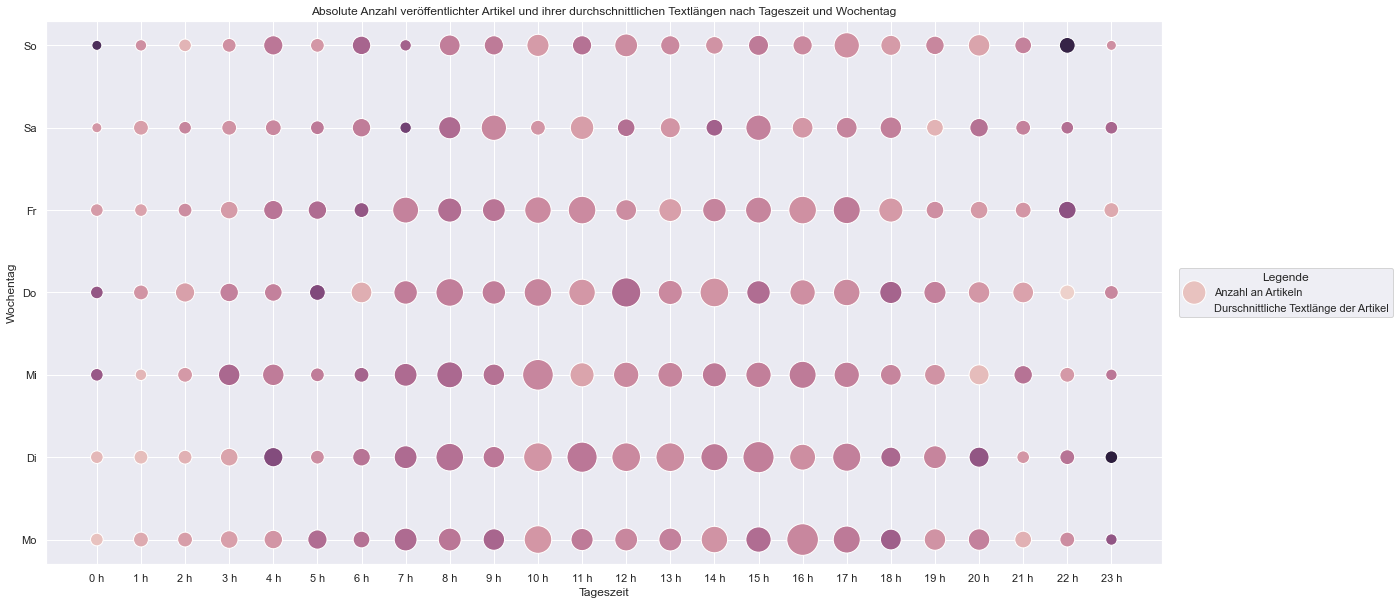

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})
 
ax = sns.scatterplot(data=news, x="hour", y="day_of_week", size="amount", hue="content_length_mean", legend='full', sizes=(100, 1000))

ax.set_title('Absolute Anzahl veröffentlichter Artikel und ihrer durchschnittlichen Textlängen nach Tageszeit und Wochentag')
ax.legend(labels=['Anzahl an Artikeln', 'Durschnittliche Textlänge der Artikel'], title='Legende', loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)
ax.set_xlabel('Tageszeit')
ax.set_ylabel('Wochentag')
ax.set_xticks(range(24))
ax.set_yticks(range(7))
ax.set_yticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
ax.set_xticklabels((str(item) + ' h') for item in list(range(0, 24)))

plt.show()